In [1]:
import pandas

data = pandas.read_csv('Crime_Data_from_2010_to_Present.csv')

In [2]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [3]:
# get related data
df = data[['Date Occurred', 'Date Reported','Time Occurred','Crime Code Description']]
df.head()

,Date Occurred,Date Reported,Time Occurred,Crime Code Description
0,03/11/2013,03/14/2013,1800,INTIMATE PARTNER - SIMPLE ASSAULT
1,01/22/2010,01/25/2010,2300,VEHICLE - STOLEN
2,03/18/2013,03/19/2013,2030,VEHICLE - STOLEN
3,11/10/2010,11/11/2010,1800,VEHICLE - STOLEN
4,01/04/2014,01/11/2014,2300,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


In [5]:
from collections import Counter
time_cnt = Counter()

#Hourly counts
for index, row in df.iterrows():
    t = row['Time Occurred'] 
    h = int(t) / 100
    time_cnt[h] += 1

print time_cnt

Counter({12: 134746, 18: 100378, 20: 97048, 19: 95296, 17: 93170, 21: 91159, 22: 88005, 15: 87509, 16: 86350, 14: 80450, 23: 77535, 13: 72576, 8: 71412, 10: 71222, 0: 69134, 11: 67186, 9: 63193, 1: 48069, 7: 42463, 2: 40610, 3: 29836, 6: 28552, 4: 22494, 5: 20476})


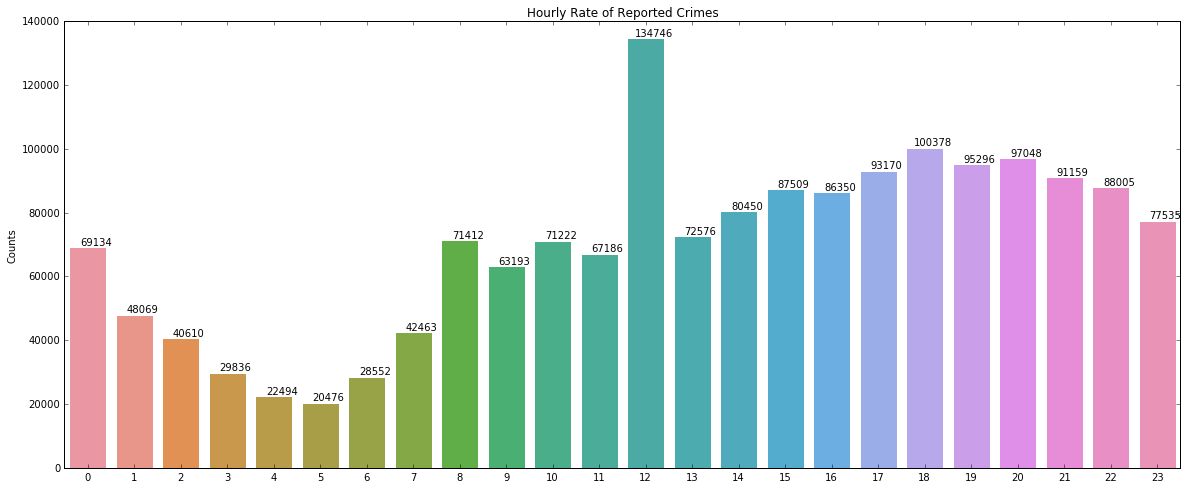

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

time_sorted_counts = []
for i in xrange(24):
    time_sorted_counts.append(time_cnt[i])

ind = np.arange(24)  # the x locations for the groups
width = 0.35       # the width of the bars
hour_labels = [ '{0}:00'.format(x) for x in xrange(24) ]

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(ind, time_sorted_counts, width, color='r')

# add labels
ax.set_ylabel('Counts')
ax.set_title('Hourly Rate of Reported Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(hour_labels)
sns.barplot(x=ind, y=time_sorted_counts, edgecolor="white")

def autolabel(rects):
    """z
    Add text on each bar
    """
    for x in rects:
        height = x.get_height()
        ax.text(x.get_x() + x.get_width()/2., height+20,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

# plt.savefig('hourly_rate.jpg')
plt.show()

In [7]:
from collections import Counter
import datetime

weekly_cnt_occured = Counter()
yearly_cnt_occured = Counter()
daily_cnt_occured = Counter()
monthly_cnt_occured = Counter()

#weekly_cnt_reported = Counter()

for index, row in df.iterrows():
    date = row['Date Occurred'] 
    m, d, y = date.split('/')
    week_num_occured = datetime.date(int(y), int(m), int(d)).weekday()
    date_num_occured = datetime.date(int(y), int(m), int(d)).timetuple().tm_yday
    weekly_cnt_occured[week_num_occured] += 1
    yearly_cnt_occured[int(y)] += 1
    monthly_cnt_occured[int(m)] +=1
    if(int(y)<2018):
        daily_cnt_occured[date_num_occured] += 1

# print weekly_cnt_occured

In [8]:
month_occured = [ ([0] * 12) for row in range(9) ]
for index, row in df.iterrows():
    date = row['Date Occurred'] 
    m, d, y = date.split('/')
    month_occured[int(y)-2010][int(m)-1] +=1

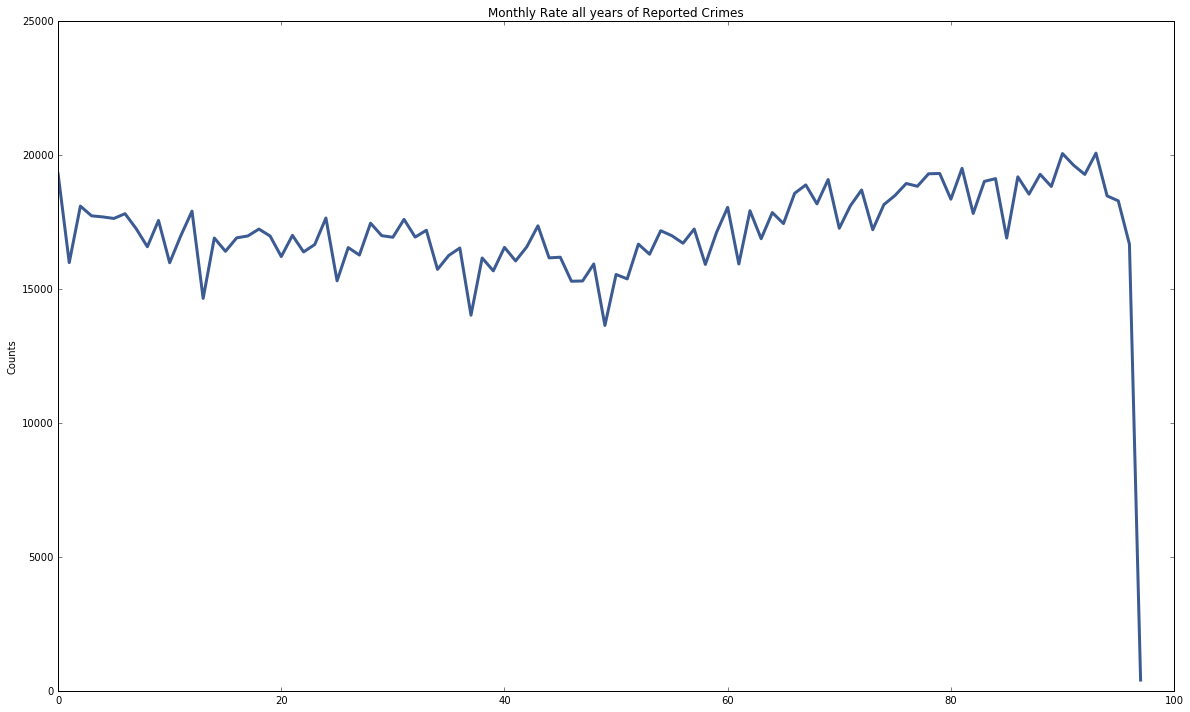

In [10]:
month_all_years =reduce(lambda x,y :x+y ,month_occured)
month_all_years =[ i for i in month_all_years if i>0]
ind = np.arange(len(month_all_years))  # the x locations for the groups
width = 0.1       # the width of the bars
month_all_lables = np.arange(len(month_all_years))

fig, ax = plt.subplots(figsize=(20, 12))
#ax.plot(daily_sorted_counts)
plt.plot(month_all_years, sns.xkcd_rgb["denim blue"], lw=3);
#sns.displot(x=day_lables, y=daily_sorted_counts)
# rects1 = ax.bar(ind, daily_sorted_counts, width, color='b')

# # add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Monthly Rate all years of Reported Crimes')

plt.show()

In [12]:
weekly_cnt_reported = Counter()
yearly_cnt_reported = Counter()
daily_cnt_reported = Counter()


for index, row in df.iterrows():
    date = row['Date Reported'] 
    m, d, y = date.split('/')
    week_num_reported = datetime.date(int(y), int(m), int(d)).weekday()
    date_num_reported = datetime.date(int(y), int(m), int(d)).timetuple().tm_yday
    weekly_cnt_reported[week_num_reported] += 1
    yearly_cnt_reported[int(y)] += 1
    if(int(y)<2018):
        daily_cnt_reported[date_num_reported] += 1

In [13]:
df1 = pandas.DataFrame({
    "Day": {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3: "Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"},
    "Crime Occurred" : weekly_cnt_occured,
    "Crime Reported" : weekly_cnt_reported
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})
# print dayrepocc.head()

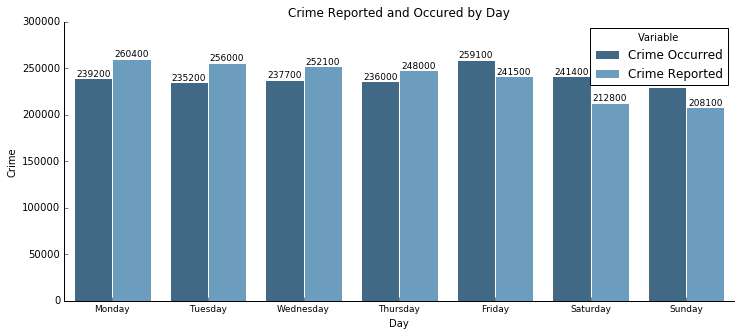

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", edgecolor="white", palette="Blues_d",data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

Counter({1: 159877, 8: 144007, 10: 143855, 7: 143675, 5: 141376, 6: 139069, 3: 138521, 9: 138418, 12: 137744, 4: 135386, 11: 132879, 2: 124062})


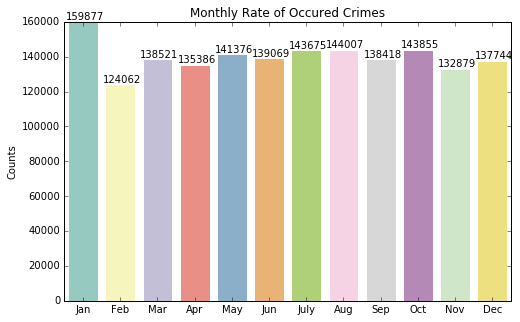

In [16]:
# monthly
print monthly_cnt_occured
monthly_sorted_counts = []
for i in xrange(12):
    monthly_sorted_counts.append(monthly_cnt_occured[i+1])
ind = np.arange(12)  # the x locations for the groups
width = 0.1      # the width of the bars
month_labels = [ 'Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec' ]

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind, monthly_sorted_counts, width, color='b')
sns.barplot(x=ind, y=monthly_sorted_counts,palette="Set3",edgecolor="white")

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Monthly Rate of Occured Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(month_labels)
autolabel(rects1)
#plt.savefig('weekly_rate.jpg')
plt.show()
sns.despine()

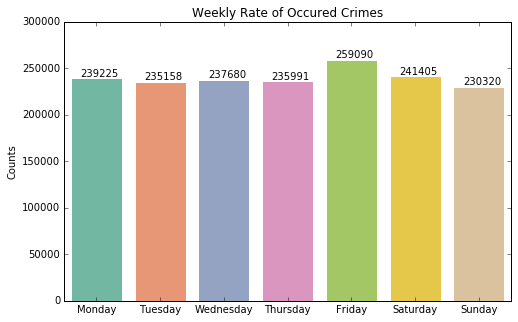

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weekly_sorted_counts = []
for i in xrange(7):
    weekly_sorted_counts.append(weekly_cnt_occured[i])

ind = np.arange(7)  # the x locations for the groups
width = 0.1      # the width of the bars
week_labels = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(ind, weekly_sorted_counts, width, color='b')
sns.barplot(x=ind, y=weekly_sorted_counts,palette="Set2",edgecolor="white")

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Weekly Rate of Occured Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(week_labels)
autolabel(rects1)
#plt.savefig('weekly_rate.jpg')
plt.show()
sns.despine()

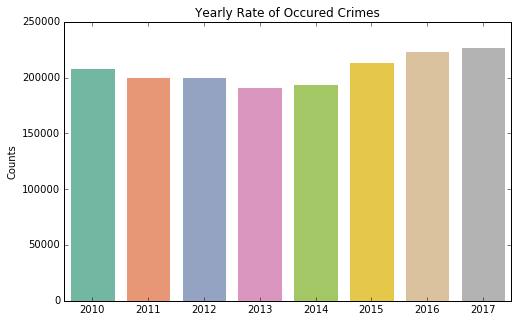

In [21]:
import numpy as np
import matplotlib.pyplot as plt

yearly_sorted_counts = []
for i in xrange(2010, 2018):
    yearly_sorted_counts.append(yearly_cnt_occured[i])

ind = np.arange(8)# the x locations for the groups
width = 0.2      # the width of the bars
week_labels = [ '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017' ]

fig, ax = plt.subplots(figsize=(8, 5))
# rects1 = ax.bar(ind, weekly_sorted_counts, width, color='b')
sns.barplot(x=ind, y=yearly_sorted_counts,palette="Set2",edgecolor="white")

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Yearly Rate of Occured Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(week_labels)

#plt.savefig('weekly_rate.jpg')
plt.show()
#sns.despine()

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
376
376


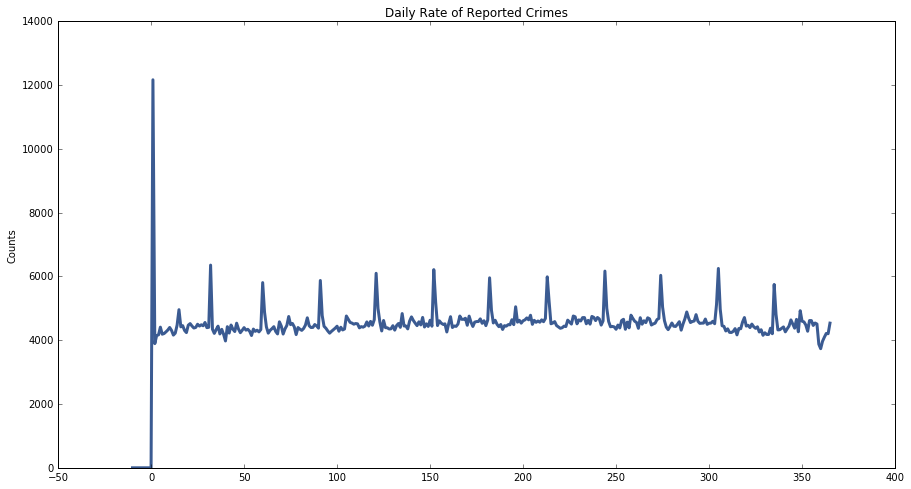

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# print range(-10,10)
daily_sorted_counts = [0,0,0,0,0,0,0,0,0,0,0]
for i in xrange(1,366):
    daily_sorted_counts.append(daily_cnt_occured[i])
# print len(daily_sorted_counts)

ind = range(-10,366)  # the x locations for the groups
print len(ind)
width = 0.1       # the width of the bars
day_lables = np.arange(365)

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(ind,daily_sorted_counts, sns.xkcd_rgb["denim blue"], lw=3);


# # add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Daily Rate of Reported Crimes')

#plt.savefig('daily_rate.jpg')
plt.show()

In [32]:
range(-10,10)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
crime_type = data['Crime Code Description'].value_counts()[:20]
crime_type.index.tolist()

['BATTERY - SIMPLE ASSAULT',
 'BURGLARY FROM VEHICLE',
 'VEHICLE - STOLEN',
 'BURGLARY',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'THEFT OF IDENTITY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'ROBBERY',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
 'DOCUMENT FORGERY / STOLEN FELONY',
 'OTHER MISCELLANEOUS CRIME',
 'VIOLATION OF COURT ORDER',
 'LETTERS, LEWD']

In [24]:
# crime_premise = time_sorted_counts
crime_20 = data[data['Crime Code Description'].isin(crime_type.index.tolist())]
#crime_20 = crime_20[crime_20['Date Occurred'].isin(crime_premise.index.tolist())]
crime_20.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [25]:

crime_20 = data[['DR Number', 'Time Occurred', 'Crime Code Description']]
crime_20.is_copy = False
print crime_20.head()
crime_20['Time Slot']= crime_20['Time Occurred'] / 100
crime_20['Time Slot'] = crime_20['Time Slot'].astype(int)
crime_20= crime_20[crime_20['Crime Code Description'].isin(crime_type.index.tolist())]

crime_20.head()

   DR Number  Time Occurred                    Crime Code Description
0    1208575           1800         INTIMATE PARTNER - SIMPLE ASSAULT
1  102005556           2300                          VEHICLE - STOLEN
2        418           2030                          VEHICLE - STOLEN
3  101822289           1800                          VEHICLE - STOLEN
4   42104479           2300  VANDALISM - MISDEAMEANOR ($399 OR UNDER)


,DR Number,Time Occurred,Crime Code Description,Time Slot
0,1208575,1800,INTIMATE PARTNER - SIMPLE ASSAULT,18
1,102005556,2300,VEHICLE - STOLEN,23
2,418,2030,VEHICLE - STOLEN,20
3,101822289,1800,VEHICLE - STOLEN,18
4,42104479,2300,VANDALISM - MISDEAMEANOR ($399 OR UNDER),23


In [26]:
import numpy as np
time_by_type  = crime_20.pivot_table(values='DR Number', index='Time Slot', 
                                       columns='Crime Code Description', aggfunc=np.size).fillna(0)

time_by_type

Crime Code Description,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BATTERY - SIMPLE ASSAULT,BURGLARY,BURGLARY FROM VEHICLE,CRIMINAL THREATS - NO WEAPON DISPLAYED,DOCUMENT FORGERY / STOLEN FELONY,INTIMATE PARTNER - SIMPLE ASSAULT,"LETTERS, LEWD",OTHER MISCELLANEOUS CRIME,ROBBERY,SHOPLIFTING - PETTY THEFT ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT OF IDENTITY,THEFT PLAIN - PETTY ($950 & UNDER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036","VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - STOLEN,VIOLATION OF COURT ORDER
Time Slot,,,,,,,,,,,,,,,,,,,,
0,3658,5444,2928,5294,1174,1464,4399,799,883,2826,284,865,2141,11048,2813,1963,3647,3101,4395,405
1,3812,5922,2342,4105,942,97,4179,334,455,2937,235,652,1421,948,2405,1119,2918,2549,3692,250
2,3205,5175,2549,3208,782,57,3575,252,355,2617,148,569,1168,335,1780,916,2592,2214,2822,190
3,1921,2768,2591,2360,563,34,2766,203,260,2025,130,419,952,315,1410,724,1864,1691,2035,174
4,1238,1707,2526,1645,429,35,1854,142,201,1519,100,285,784,305,1080,625,1362,1212,1682,159
5,949,1393,2502,1567,367,51,1384,143,177,1339,75,314,803,340,1178,602,1155,1009,1943,133
6,855,1856,3571,1903,658,236,1528,322,301,1077,124,350,1309,1930,1718,1055,1412,1436,2805,250
7,1281,3454,6616,2463,1228,270,2180,467,533,1152,243,493,1832,1919,2818,1487,1919,2064,3377,464
8,1721,4970,7886,3327,1843,1678,2958,1182,864,1326,566,697,2814,11794,4808,3221,2709,2704,4104,768


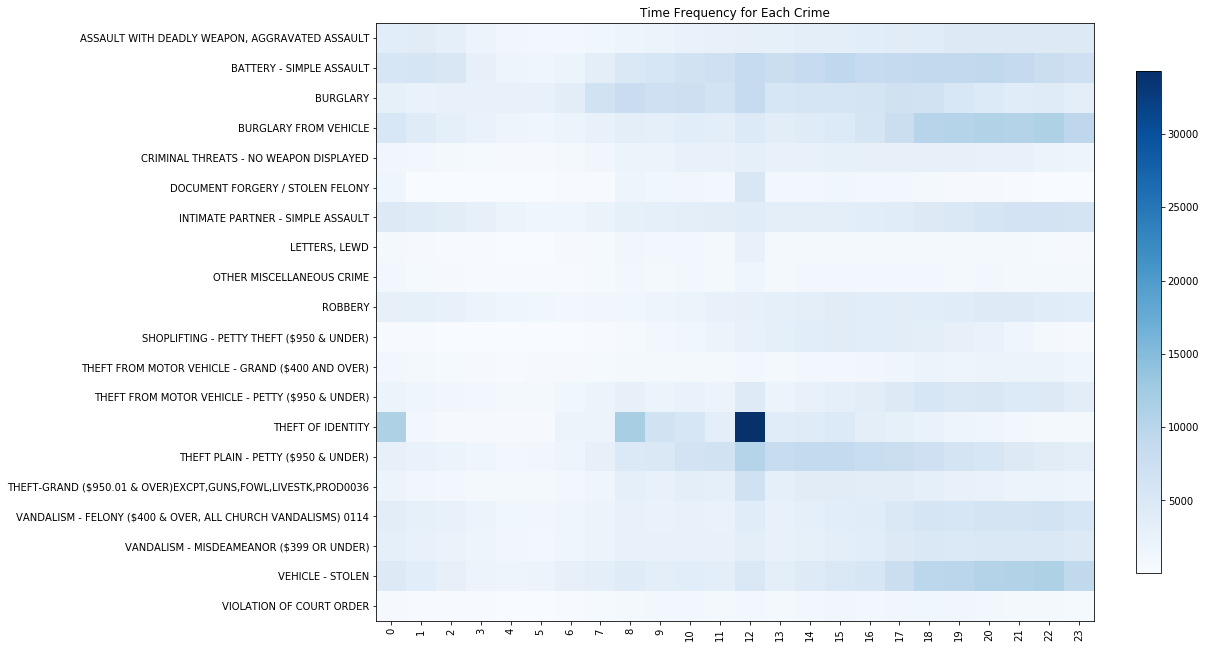

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as AC
%matplotlib inline
#Without Normalization
df = time_by_type
# ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(15,11))
plt.imshow(df.T, cmap='Blues')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Time Frequency for Each Crime')
# plt.grid(False)
plt.savefig('time_freq1.jpg')
plt.show()

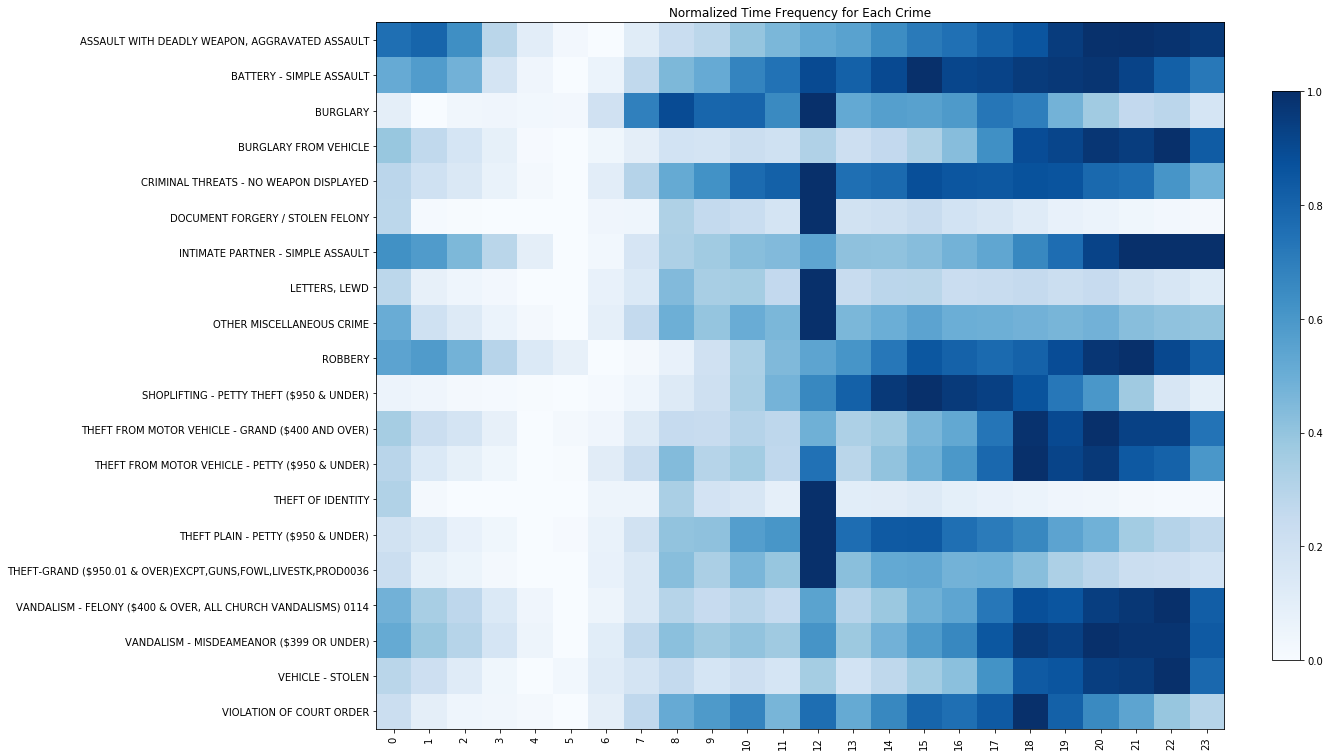

In [12]:
#With Normalization
df = time_by_type
df_norm = (df - df.min()) / (df.max() - df.min())
# ix = AC(3).fit(df_norm.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df_norm.T, cmap='Blues')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df_norm.shape[0]), df_norm.index, rotation='vertical')
plt.yticks(np.arange(df_norm.shape[1]), df_norm.columns)
plt.title('Normalized Time Frequency for Each Crime')
plt.grid(False)
plt.savefig('time_freq2.jpg')
plt.show()

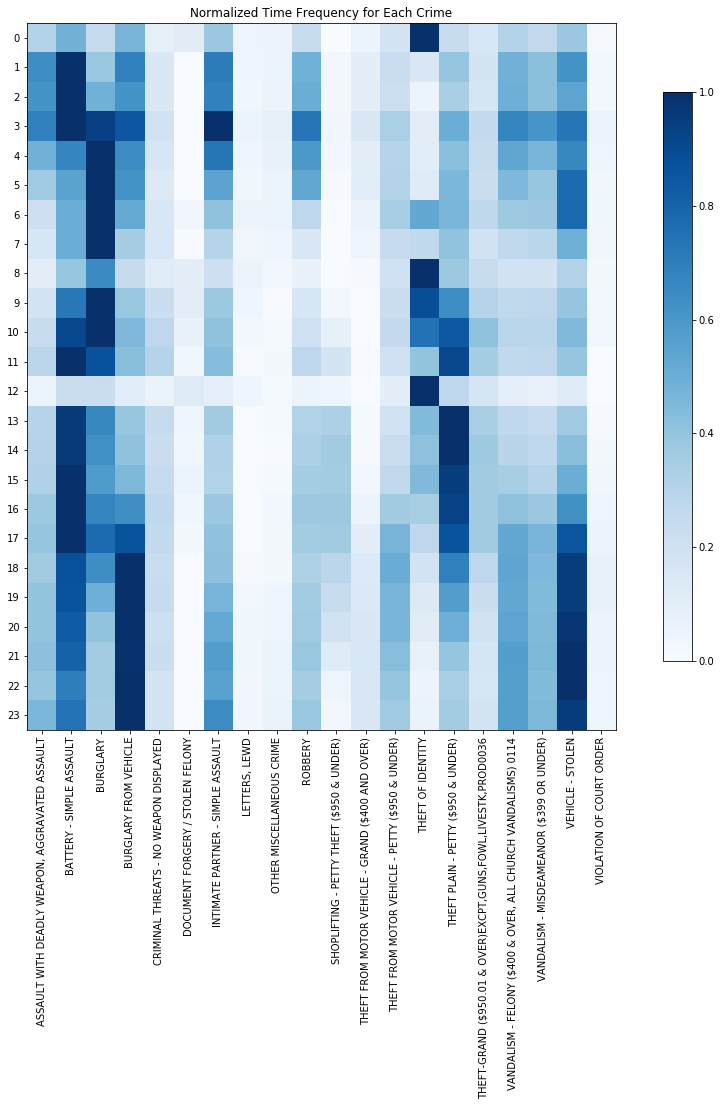

In [13]:
#With Normalization
df = time_by_type
df_norm = (df.T - df.T.min()) / (df.T.max() - df.T.min())
# ix = AC(3).fit(df_norm.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df_norm.T, cmap='Blues')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df_norm.shape[0]), df_norm.index, rotation='vertical')
plt.yticks(np.arange(df_norm.shape[1]), df_norm.columns)
plt.title('Normalized Time Frequency for Each Crime')
plt.grid(False)
plt.savefig('time_freq3.jpg')
plt.show()